## Notebook for NaI Array Calibration Curve
Alya Sharbaugh, Anthony Villano, University of Colorado Denver

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Functions

In [2]:
# Define function for pulling data from dataframe

def GrabData(data):

    detNames = data['Detector'].values     # Array for detector names
    
    cen1 = data['Peak1Center'].values      # Array for Peak 1 center
    cen1err = data['Peak1CenErr'].values   # Array for Peak 1 cen error
    cen2 = data['Peak2Center'].values      # Array for Peak 2 center
    cen2err = data['Peak2CenErr'].values   # Array for Peak 2 cen error
    
    return detNames,cen1,cen1err,cen2,cen2err
    

In [3]:
# Define function for plotting curve

def PlotCurve(name,y,x1,x1err,x2,x2err,x3,x3err,x4,x4err,tx1,tx1err,tx2,tx2err,tx3,tx3err,tx4,tx4err):

    x = [x1,x2,x3,x4]                     #Compile centers into array   
    xerrs = [x1err,x2err,x3err,x4err]     #Compile errors into array 

    tx = [tx1,tx2,tx3,tx4]
    txerrs = [tx1err,tx2err,tx3err,tx4err]

    fig, ax = plt.subplots(figsize=(8, 5))
    title = "Detector " + str(name)

    ax.plot(x,y,'bo',label='Original Peak')   # Plot energy vs channel points
    ax.errorbar(x,y,xerr=xerrs,fmt="o",color="b")   # Error too small to show on plot

    ax.plot(tx,y,'go',label='Current Peak')   # Plot energy vs channel points
    ax.errorbar(tx,y,xerr=txerrs,fmt="o",color="g")   # Error too small to show on plot

    ######################################################################################################

    z = np.polyfit(x,y,1)   # Perform a linear fit
    fit = np.poly1d(z)
    fitx = np.linspace(x1,x4,50)
    fity = fit(fitx)

    fitlabel = "Original Curve " + str(fit)

    ax.plot(fitx,fity,'r--',label=fitlabel)   # Plot fit

    ######################################################################################################

    z = np.polyfit(tx,y,1)   # Perform a linear fit
    fit = np.poly1d(z)
    fitx = np.linspace(tx1,tx4,50)
    fity = fit(fitx)

    fitlabel = "Current Curve " + str(fit)

    ax.plot(fitx,fity,'m--',label=fitlabel)   # Plot fit

    ######################################################################################################
    
    ax.set_title(title)
    ax.set_xlabel("ADC Channel")
    ax.set_ylabel("Energy (keV)")
    ax.legend(loc=2,prop={'size':10})
    
    plt.show()
    

### Calibration Curve

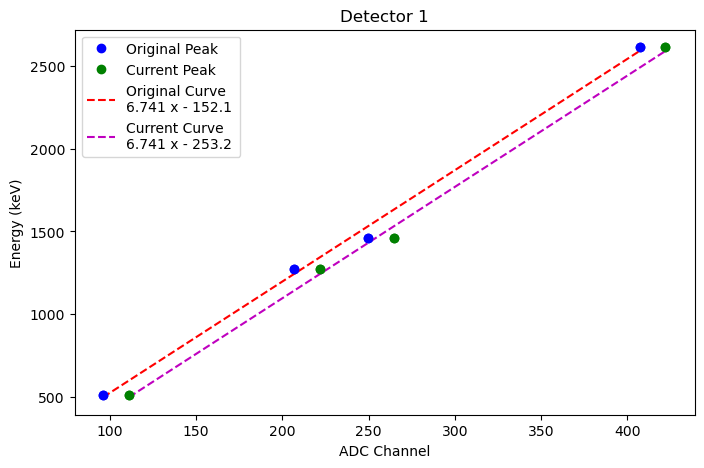

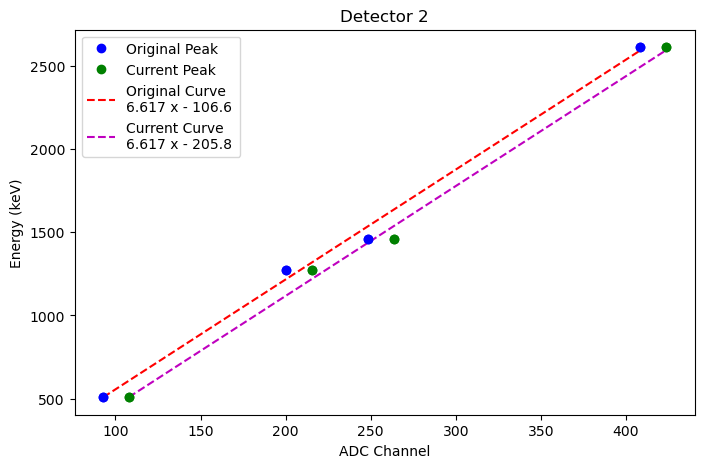

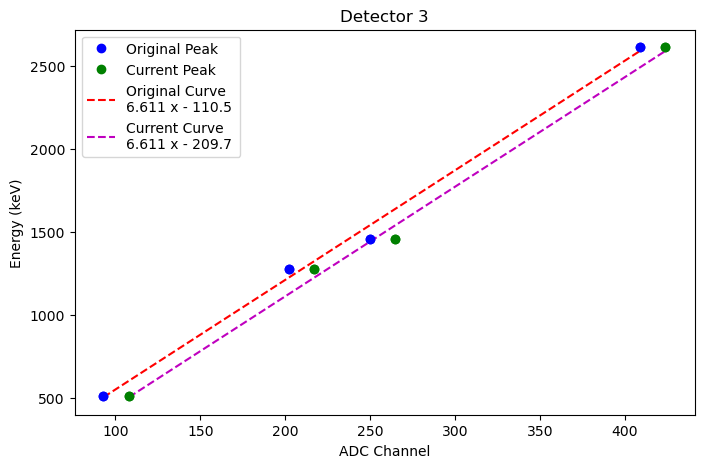

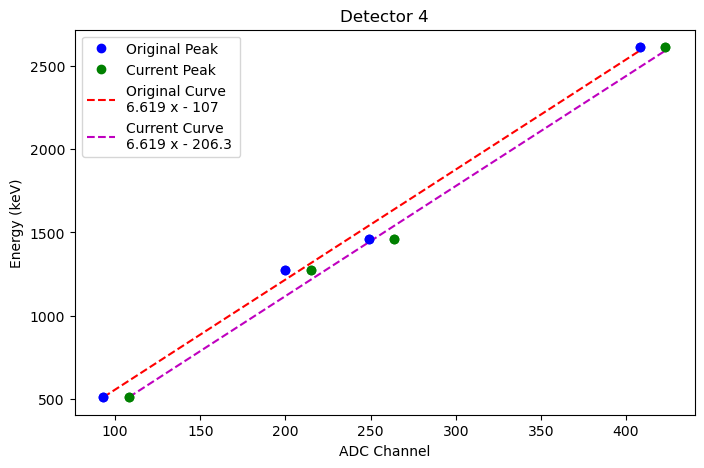

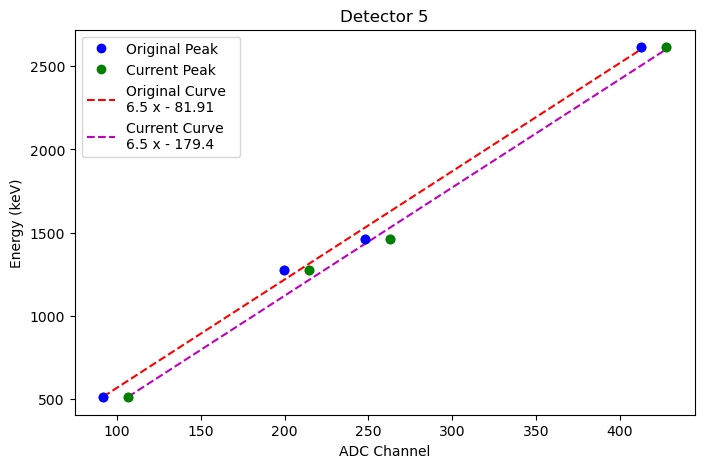

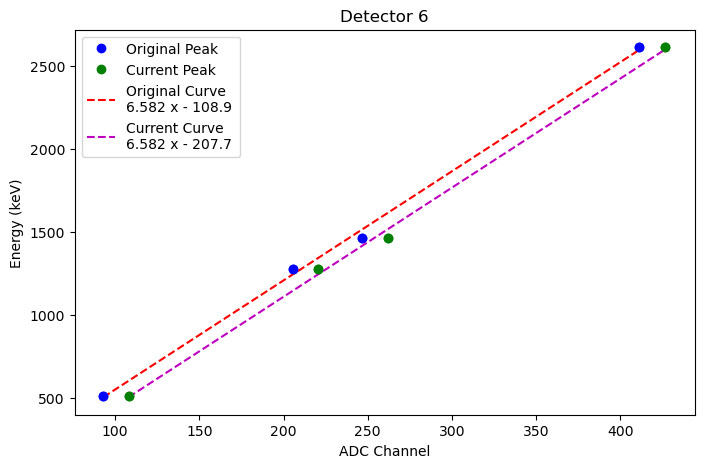

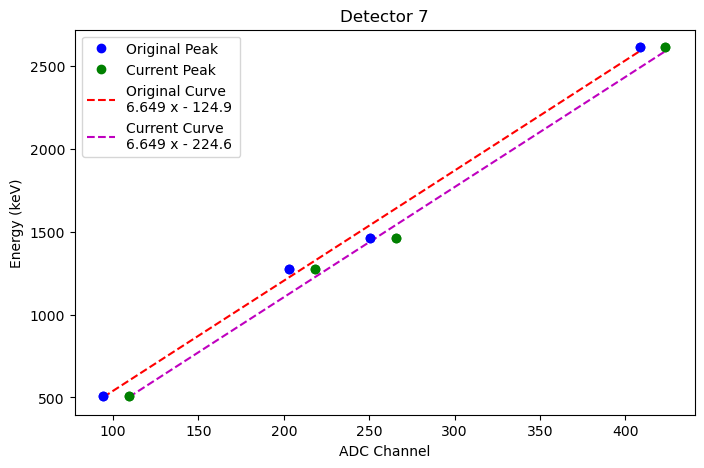

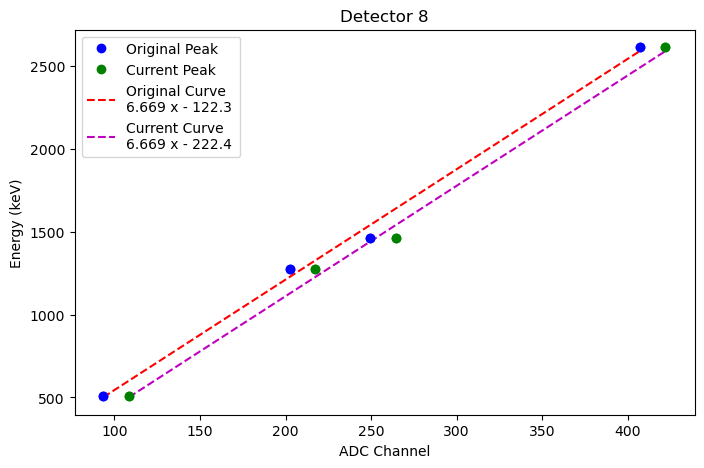

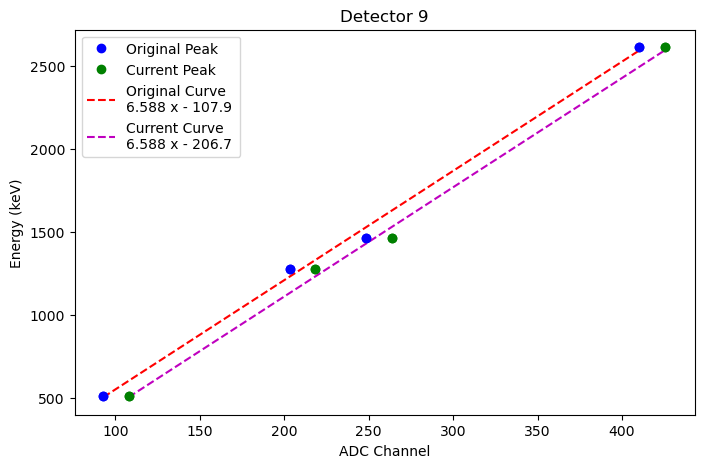

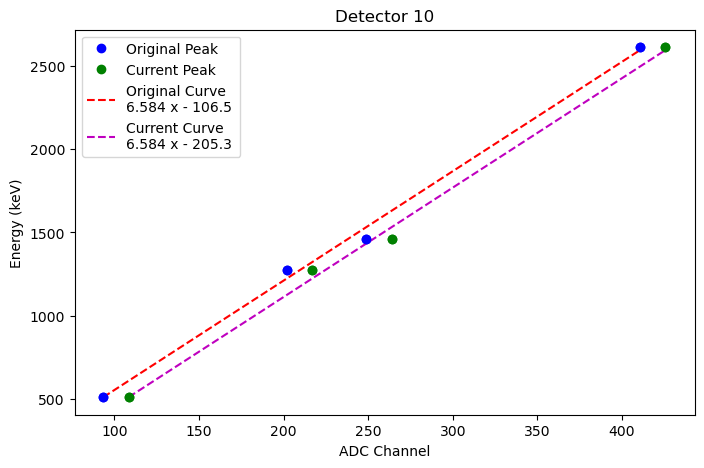

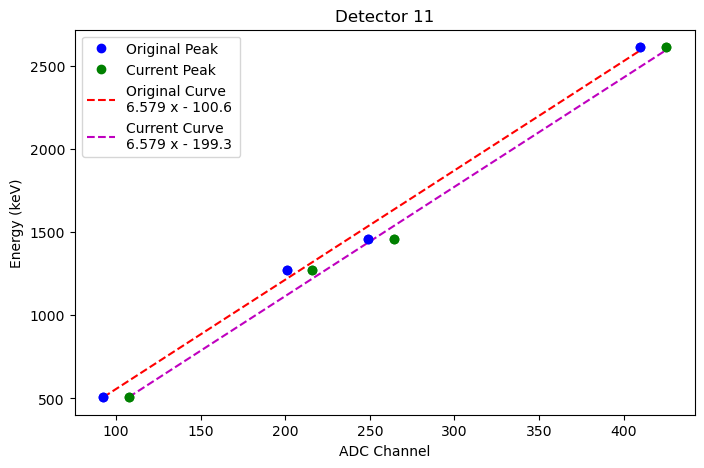

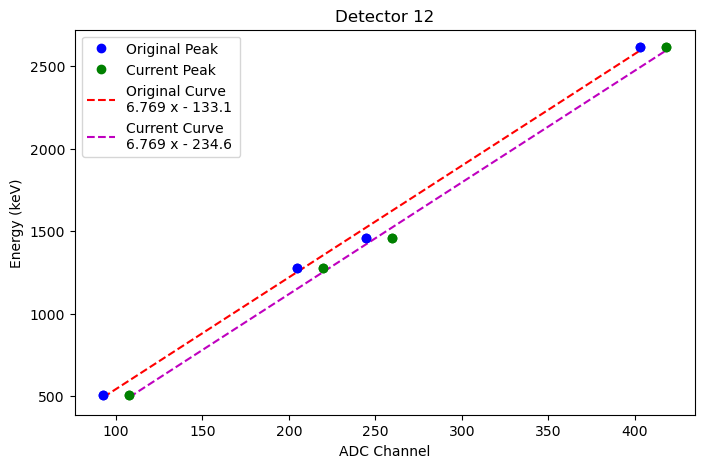

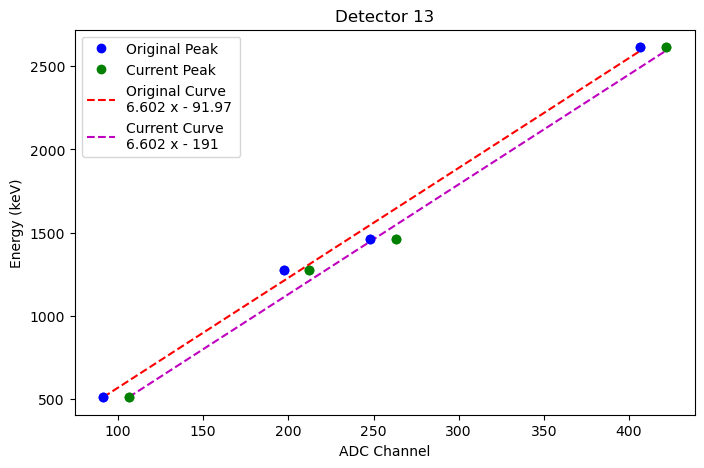

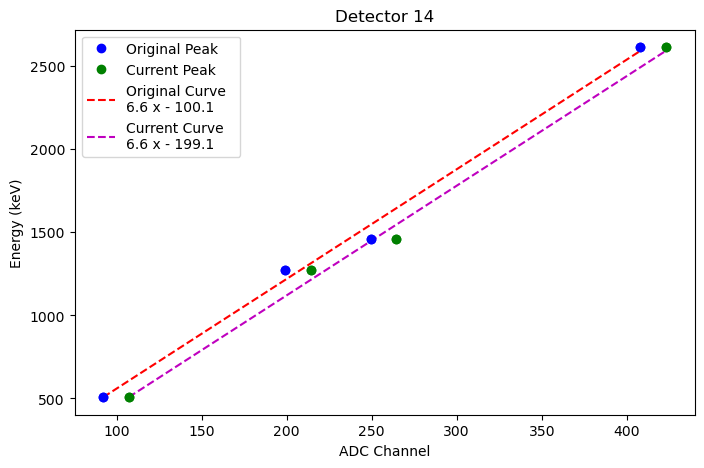

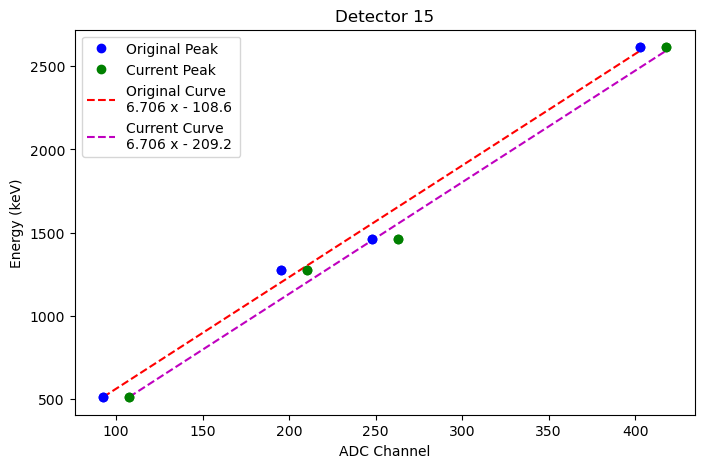

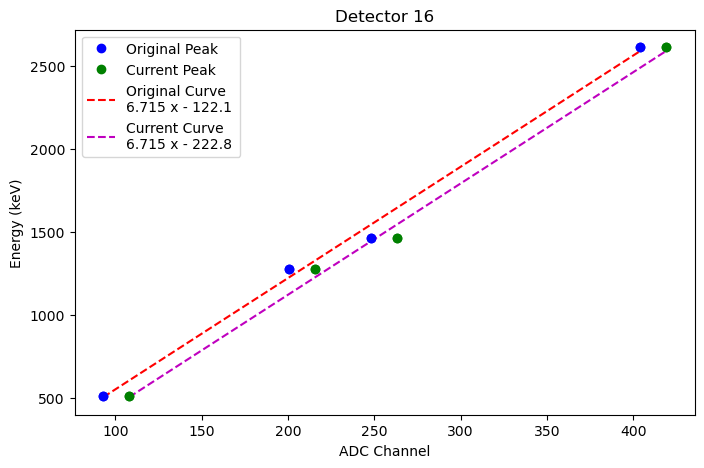

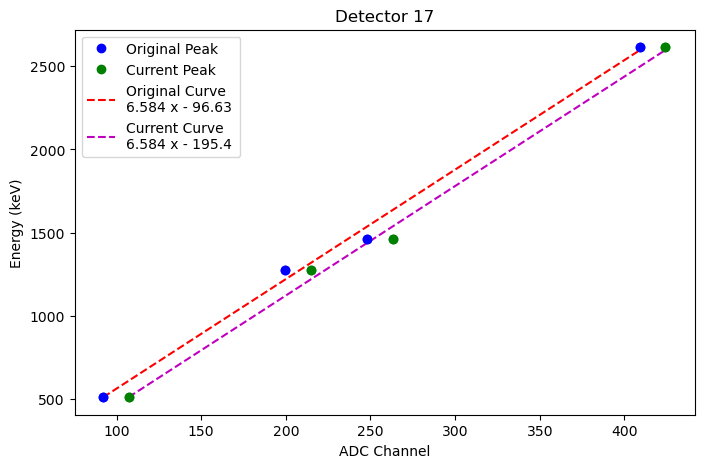

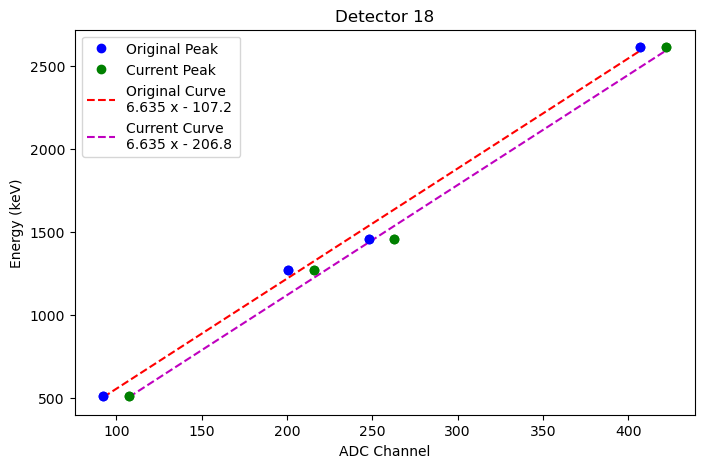

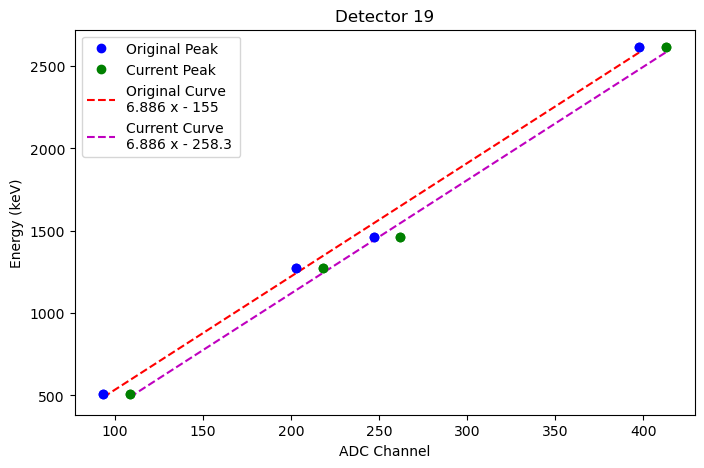

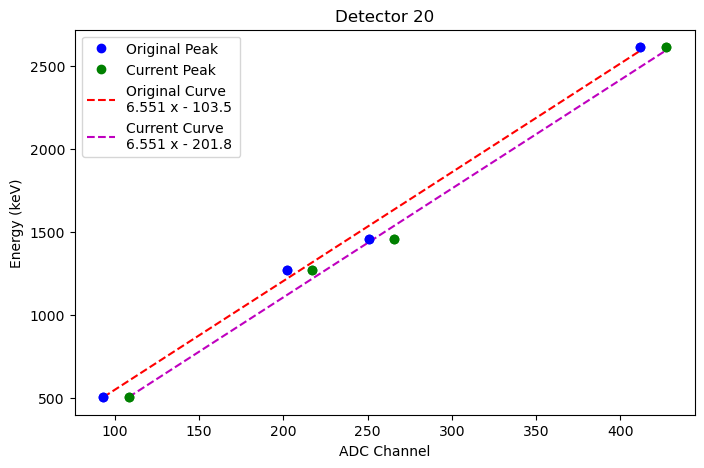

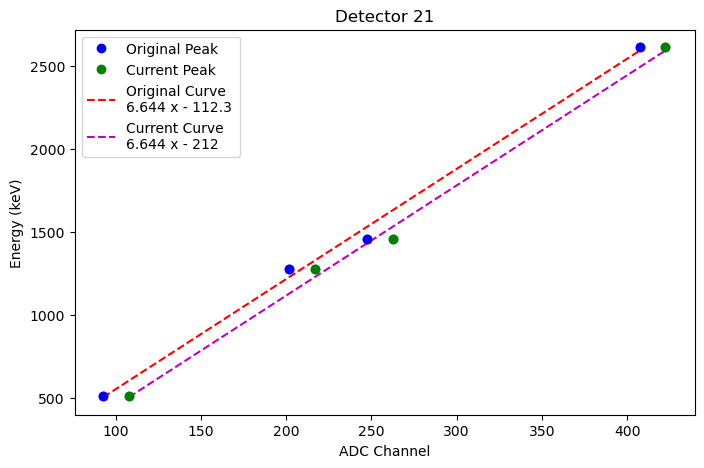

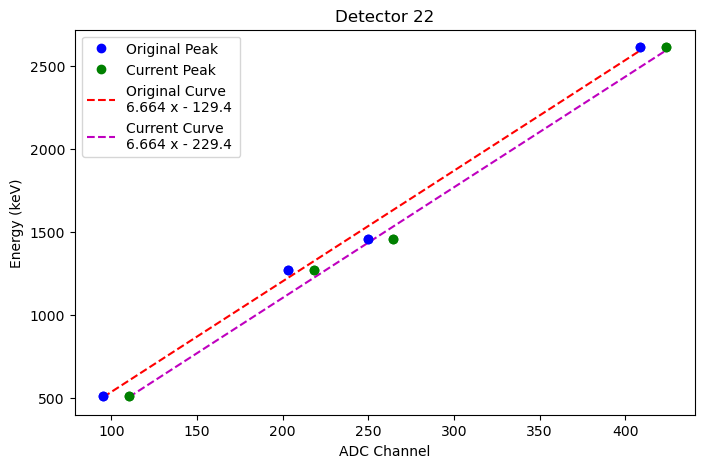

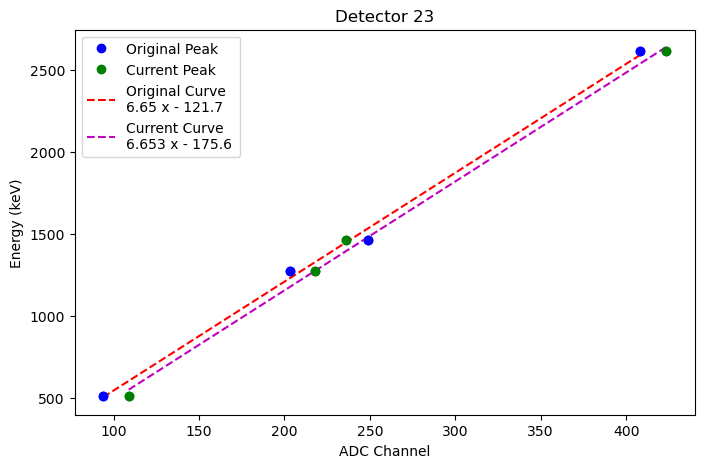

In [5]:
# Create energy array using known channel/energy correlation
# Energy values from: https://www.nndc.bnl.gov/

Na22Peak1 = 511   # keV, matches Na_cen1
Na22Peak2 = 1274.5   # keV, matches Na_cen2
bkndPeak1 = 1460.8   # keV, matches bk_cen1
bkndPeak2 = 2614.5   # keV, matches bk_cen2

energy = [Na22Peak1,Na22Peak2,bkndPeak1,bkndPeak2]   # Order from smallest to largest

######################################################################################################

bkndData = pd.read_csv('bkndCalParams.csv')   # Load background fit parameters from .csv
detName,bk_cen1,bk_cen1err,bk_cen2,bk_cen2err = GrabData(bkndData)

Na22Data = pd.read_csv('Na22CalParams.csv')   # Load Na-22 fit parameters from .csv
detName,Na_cen1,Na_cen1err,Na_cen2,Na_cen2err = GrabData(Na22Data)

bkndTest = pd.read_csv('bkndTestParams.csv')   # Load background test parameters from .csv
detName,tbk_cen1,tbk_cen1err,tbk_cen2,tbk_cen2err = GrabData(bkndTest)

Na22Test = pd.read_csv('Na22TestParams.csv')   # Load Na-22 test parameters from .csv
detName,tNa_cen1,tNa_cen1err,tNa_cen2,tNa_cen2err = GrabData(Na22Test)

######################################################################################################

for i in range(0,len(detName)):

    # Plot calibration curve for each detector, send peaks in order of increasing energy
    PlotCurve(detName[i],energy,Na_cen1[i],Na_cen1err[i],Na_cen2[i],Na_cen2err[i],bk_cen1[i],bk_cen1err[i],bk_cen2[i],bk_cen2err[i],
                 tNa_cen1[i],tNa_cen1err[i],tNa_cen2[i],tNa_cen2err[i],tbk_cen1[i],tbk_cen1err[i],tbk_cen2[i],tbk_cen2err[i])
